# Final Project

### Comparative Analysis of Machine Learning Classifiers on UCI Datasets

This study conducts a comprehensive analysis of three popular machine learning classifiers - Logistic Regression, SVM, and Random Forests- on three datasets from the UCI repository: Adult, German Credit, and Breast Cancer Wisconsin Diagnostic. Employing cross-validation techniques, we identify optimal hyperparameters for each classifier and dataset combination. Our findings offer insights into the classifiers' performance, measured by accuracy across varying data partitions. The results demonstrate notable trends in classifier effectiveness, with implications for practical applications in predictive modeling.

## Adult Dataset

This dataset, also known as the "Census Income" dataset, contains demographic information extracted from the 1994 Census database. It poses a binary classification problem where the task is to predict whether an individual earns more than $50,000 a year. The dataset is characterized by a mixture of continuous and categorical variables, including age, education, occupation, and hours per week.

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
columns = ["age", "workclass", "fnlwgt", "education", "education_num", "marital_status",
           "occupation", "relationship", "race", "sex", "capital_gain", "capital_loss",
           "hours_per_week", "native_country", "income"]
adult_data = pd.read_csv(url, header=None, names=columns, na_values=' ?')

In [3]:
print(adult_data.head())

   age          workclass  fnlwgt   education  education_num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital_status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital_gain  capital_loss  hours_per_week  native_country  income  
0          2174             0              40   United-States   <=50

In [4]:
print(adult_data['income'].unique())

[' <=50K' ' >50K']


In [5]:
# Handle missing values
adult_data = adult_data.dropna()

adult_data['income'] = adult_data['income'].apply(lambda x: x.strip()).map({'>50K': 1, '<=50K': 0})
adult_data = pd.get_dummies(adult_data, drop_first=True)

In [6]:
scaler = StandardScaler()
numerical_cols = ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']
adult_data[numerical_cols] = scaler.fit_transform(adult_data[numerical_cols])

In [7]:
X_ad = adult_data.drop('income', axis=1)
y_ad = adult_data['income']

In [8]:
X_ad_train_2080, X_ad_test_2080, y_ad_train_2080, y_ad_test_2080 = train_test_split(X_ad, y_ad, test_size=0.80, random_state=42)
X_ad_train_5050, X_ad_test_5050, y_ad_train_5050, y_ad_test_5050 = train_test_split(X_ad, y_ad, test_size=0.50, random_state=42)
X_ad_train_8020, X_ad_test_8020, y_ad_train_8020, y_ad_test_8020 = train_test_split(X_ad, y_ad, test_size=0.20, random_state=42)

In [9]:
# Define the parameter range for 'C'
param_range = [0.001, 0.01, 0.1, 1, 10, 100]

In [10]:
# Initialize classifiers and parameter grid
log_reg = LogisticRegression(solver='liblinear', class_weight='balanced')
svm = SVC()
rf = RandomForestClassifier(n_estimators=100)  # Example parameter
param_grid = {'C': param_range}

In [11]:
# Dictionary to store results
results = {}

### For 20/80 Partition

In [12]:
# Logistic Regression with GridSearchCV
grid_lr_2080 = GridSearchCV(log_reg, {'C': param_range}, cv=3, scoring='accuracy')
grid_lr_2080.fit(X_ad_train_2080, y_ad_train_2080)
best_lr_score_2080 = grid_lr_2080.best_score_

In [13]:
# SVM with GridSearchCV
grid_svm_2080 = GridSearchCV(svm, param_grid, cv=3, scoring='accuracy')
grid_svm_2080.fit(X_ad_train_2080, y_ad_train_2080)
best_svm_score_2080 = grid_svm_2080.best_score_

In [14]:
# RandomForestClassifier
rf.fit(X_ad_train_2080, y_ad_train_2080)
rf_accuracy_2080 = accuracy_score(y_ad_test_2080, rf.predict(X_ad_test_2080))

In [15]:
# Store results for 20/80 partition
results_2080 = {
    'Logistic Regression': best_lr_score_2080,
    'SVM': best_svm_score_2080,
    'Random Forest': rf_accuracy_2080
}

In [16]:
print ("For 20/80")
print ("logistic regression accuracy: ",best_lr_score_2080)
print ("SVM accuracy: ",best_svm_score_2080)
print ("Random Forest accuracy: ",rf_accuracy_2080)

For 20/80
logistic regression accuracy:  0.8028843846406951
SVM accuracy:  0.8456562702812804
Random Forest accuracy:  0.8495234148363033


### 50/50 partition

In [17]:
# Logistic Regression with GridSearchCV
grid_lr_5050 = GridSearchCV(log_reg, {'C': param_range}, cv=3, scoring='accuracy')
grid_lr_5050.fit(X_ad_train_5050, y_ad_train_5050)
best_lr_score_5050 = grid_lr_5050.best_score_

In [18]:
# SVM with GridSearchCV
grid_svm_5050 = GridSearchCV(svm, param_grid, cv=3, scoring='accuracy')
grid_svm_5050.fit(X_ad_train_5050, y_ad_train_5050)
best_svm_score_5050 = grid_svm_5050.best_score_

In [19]:
# RandomForestClassifier
rf.fit(X_ad_train_5050, y_ad_train_5050)
rf_accuracy_5050 = accuracy_score(y_ad_test_5050, rf.predict(X_ad_test_5050))

In [20]:
# Store results for 20/80 partition
results_5050 = {
    'Logistic Regression': best_lr_score_5050,
    'SVM': best_svm_score_5050,
    'Random Forest': rf_accuracy_5050
}

In [21]:
print ("For 50/50")
print ("logistic regression accuracy: ",best_lr_score_5050)
print ("SVM accuracy: ",best_svm_score_5050)
print ("Random Forest accuracy: ",rf_accuracy_5050)

For 50/50
logistic regression accuracy:  0.8047874809362775
SVM accuracy:  0.8488827000862011
Random Forest accuracy:  0.8496120946886812


### for 80/20 partition

In [22]:
# Logistic Regression with GridSearchCV
grid_lr_8020 = GridSearchCV(log_reg, {'C': param_range}, cv=3, scoring='accuracy')
grid_lr_8020.fit(X_ad_train_8020, y_ad_train_8020)
best_lr_score_8020 = grid_lr_8020.best_score_

In [23]:
# SVM with GridSearchCV
grid_svm_8020 = GridSearchCV(svm, param_grid, cv=3, scoring='accuracy')
grid_svm_8020.fit(X_ad_train_8020, y_ad_train_8020)
best_svm_score_8020 = grid_svm_8020.best_score_

In [24]:
# RandomForestClassifier
rf.fit(X_ad_train_8020, y_ad_train_8020)
rf_accuracy_8020 = accuracy_score(y_ad_test_8020, rf.predict(X_ad_test_8020))

In [25]:
# Store results for 80/20 partition
results_8020 = {
    'Logistic Regression': best_lr_score_8020,
    'SVM': best_svm_score_8020,
    'Random Forest': rf_accuracy_8020
}

In [26]:
print ("For 80/20")
print ("logistic regression accuracy: ",best_lr_score_8020)
print ("SVM accuracy: ",best_svm_score_8020)
print ("Random Forest accuracy: ",rf_accuracy_8020)

For 80/20
logistic regression accuracy:  0.8082804923535994
SVM accuracy:  0.8496000663102491
Random Forest accuracy:  0.8511519973479198


In [27]:
# Define results for the adult dataset
results_8020_adult = {
    'Logistic Regression': best_lr_score_8020,
    'SVM': best_svm_score_8020,
    'Random Forest': rf_accuracy_8020
}

results_5050_adult = {
    'Logistic Regression': best_lr_score_5050,
    'SVM': best_svm_score_5050,
    'Random Forest': rf_accuracy_5050
}

results_2080_adult = {
    'Logistic Regression': best_lr_score_2080,
    'SVM': best_svm_score_2080,
    'Random Forest': rf_accuracy_2080
}

## German Credit Dataset

The German Credit dataset presents data on individuals' credit risk from a German bank. Each entry represents a person described by a set of attributes, such as credit history, employment duration, and purpose of the loan. The target variable is binary, indicating high or low credit risk. The challenge with this dataset lies in its imbalanced nature and the presence of qualitative, subjective measures.

In [28]:
# Load the dataset
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data"
columns = ["existing_account", "duration_month", "credit_history", "purpose", "credit_amount", "savings_account",
           "present_employment", "installment_rate", "personal_status_sex", "other_debtors", "present_residence",
           "property", "age", "other_installment_plans", "housing", "number_credits", "job", "people_liable", "telephone",
           "foreign_worker", "credit_risk"]

german_data = pd.read_csv(url, sep=" ", header=None, names=columns)

In [29]:
german_data.head()

,existing_account,duration_month,credit_history,purpose,credit_amount,savings_account,present_employment,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [30]:
german_data['credit_risk'] = german_data['credit_risk'].replace(2, 0)


In [31]:
german_data.head()

,existing_account,duration_month,credit_history,purpose,credit_amount,savings_account,present_employment,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,0
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,0


In [32]:
# Handle categorical variables using one-hot encoding
german_data = pd.get_dummies(german_data, columns=["existing_account", "credit_history", "purpose", "savings_account",
                                                   "present_employment", "personal_status_sex", "other_debtors",
                                                   "property", "other_installment_plans", "housing", "job",
                                                   "telephone", "foreign_worker"],
                             drop_first=True)

In [33]:
# Standardize numerical features
scaler = StandardScaler()
numerical_cols = ["duration_month", "credit_amount", "installment_rate", "present_residence", "age", "number_credits",
                   "people_liable"]
german_data[numerical_cols] = scaler.fit_transform(german_data[numerical_cols])

In [34]:
# Split the dataset into X (features) and y (target)
X_credit = german_data.drop("credit_risk", axis=1)
y_credit = german_data["credit_risk"]
y_credit.head()

0    1
1    0
2    1
3    1
4    0
Name: credit_risk, dtype: int64

In [35]:
# Split the dataset into 80/20, 50/50, and 20/80 partitions
X_credit_train_8020, X_credit_test_8020, y_credit_train_8020, y_credit_test_8020 = train_test_split(X_credit, y_credit, test_size=0.20, random_state=42)
X_credit_train_5050, X_credit_test_5050, y_credit_train_5050, y_credit_test_5050 = train_test_split(X_credit, y_credit, test_size=0.50, random_state=42)
X_credit_train_2080, X_credit_test_2080, y_credit_train_2080, y_credit_test_2080 = train_test_split(X_credit, y_credit, test_size=0.80, random_state=42)

In [36]:
# Define the parameter range for 'C'
param_range = [0.001, 0.01, 0.1, 1, 10, 100]


In [37]:
log_reg = LogisticRegression(solver='liblinear', class_weight='balanced')
svm = SVC()
rf = RandomForestClassifier(n_estimators=100)  # Example parameter
param_grid = {'C': param_range}
print(y_credit_train_8020.isnull().sum())

0


In [38]:
print(y_credit_train_8020.isnull().sum())

0


In [39]:
# Dictionary to store results
results = {}

In [40]:
# For 80/20 Partition
# Logistic Regression with GridSearchCV
grid_lr_8020 = GridSearchCV(log_reg, {'C': param_range}, cv=3, scoring='accuracy')
grid_lr_8020.fit(X_credit_train_8020, y_credit_train_8020)
best_lr_score_8020 = grid_lr_8020.best_score_

# SVM with GridSearchCV
grid_svm_8020 = GridSearchCV(svm, param_grid, cv=3, scoring='accuracy')
grid_svm_8020.fit(X_credit_train_8020, y_credit_train_8020)
best_svm_score_8020 = grid_svm_8020.best_score_

# RandomForestClassifier
rf.fit(X_credit_train_8020, y_credit_train_8020)
rf_accuracy_8020 = accuracy_score(y_credit_test_8020, rf.predict(X_credit_test_8020))

# Store results for 80/20 partition
results_8020 = {
    'Logistic Regression': best_lr_score_8020,
    'SVM': best_svm_score_8020,
    'Random Forest': rf_accuracy_8020
}

In [41]:
# Print results
print("For 80/20")
print("Logistic Regression accuracy:", best_lr_score_8020)
print("SVM accuracy:", best_svm_score_8020)
print("Random Forest accuracy:", rf_accuracy_8020)


For 80/20
Logistic Regression accuracy: 0.7037396862943877
SVM accuracy: 0.7362648193517503
Random Forest accuracy: 0.74


In [42]:
# For 50/50 Partition
# Logistic Regression with GridSearchCV
grid_lr_5050 = GridSearchCV(log_reg, {'C': param_range}, cv=3, scoring='accuracy')
grid_lr_5050.fit(X_credit_train_5050, y_credit_train_5050)
best_lr_score_5050 = grid_lr_5050.best_score_

# SVM with GridSearchCV
grid_svm_5050 = GridSearchCV(svm, param_grid, cv=3, scoring='accuracy')
grid_svm_5050.fit(X_credit_train_5050, y_credit_train_5050)
best_svm_score_5050 = grid_svm_5050.best_score_

# RandomForestClassifier
rf.fit(X_credit_train_5050, y_credit_train_5050)
rf_accuracy_5050 = accuracy_score(y_credit_test_5050, rf.predict(X_credit_test_5050))

# Store results for 50/50 partition
results_5050 = {
    'Logistic Regression': best_lr_score_5050,
    'SVM': best_svm_score_5050,
    'Random Forest': rf_accuracy_5050
}

In [43]:
print("For 50/50")
print("Logistic Regression accuracy:", best_lr_score_5050)
print("SVM accuracy:", best_svm_score_5050)
print("Random Forest accuracy:", rf_accuracy_5050)

For 50/50
Logistic Regression accuracy: 0.735973835461607
SVM accuracy: 0.7420099559916311
Random Forest accuracy: 0.736


In [44]:
# For 20/80 Partition
# Logistic Regression with GridSearchCV
grid_lr_2080 = GridSearchCV(log_reg, {'C': param_range}, cv=3, scoring='accuracy')
grid_lr_2080.fit(X_credit_train_2080, y_credit_train_2080)
best_lr_score_2080 = grid_lr_2080.best_score_

# SVM with GridSearchCV
grid_svm_2080 = GridSearchCV(svm, param_grid, cv=3, scoring='accuracy')
grid_svm_2080.fit(X_credit_train_2080, y_credit_train_2080)
best_svm_score_2080 = grid_svm_2080.best_score_

# RandomForestClassifier
rf.fit(X_credit_train_2080, y_credit_train_2080)
rf_accuracy_2080 = accuracy_score(y_credit_test_2080, rf.predict(X_credit_test_2080))

# Store results for 20/80 partition
results_2080 = {
    'Logistic Regression': best_lr_score_2080,
    'SVM': best_svm_score_2080,
    'Random Forest': rf_accuracy_2080
}

In [45]:
print("For 20/80")
print("Logistic Regression accuracy:", best_lr_score_2080)
print("SVM accuracy:", best_svm_score_2080)
print("Random Forest accuracy:", rf_accuracy_2080)

For 20/80
Logistic Regression accuracy: 0.7202623247399367
SVM accuracy: 0.7400120609075834
Random Forest accuracy: 0.7275


In [47]:
# Define results for the credit dataset
results_8020_credit = {
    'Logistic Regression': best_lr_score_8020,
    'SVM': best_svm_score_8020,
    'Random Forest': rf_accuracy_8020
}

results_5050_bank = {
    'Logistic Regression': best_lr_score_5050,
    'SVM': best_svm_score_5050,
    'Random Forest': rf_accuracy_5050
}

results_2080_bank = {
    'Logistic Regression': best_lr_score_2080,
    'SVM': best_svm_score_2080,
    'Random Forest': rf_accuracy_2080
}

## Breast Cancer

This dataset contains diagnostic information of breast cancer cases, where each case is labeled as malignant or benign. Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass, describing characteristics of the cell nuclei present in the image. The complexity here is due to the high-dimensionality and the sensitive nature of the predictions.

In [48]:
import pandas as pd

# URL of the dataset
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"

# Column names as per the dataset description
column_names = ["Sample_code_number", "Clump_thickness", "Uniformity_of_cell_size",
                "Uniformity_of_cell_shape", "Marginal_adhesion", "Single_epithelial_cell_size",
                "Bare_nuclei", "Bland_chromatin", "Normal_nucleoli", "Mitoses", "Class"]

# Import the dataset, handling missing values
data_cancer = pd.read_csv(url, names=column_names, na_values="?")

# Drop rows with missing values
data_cancer.dropna(inplace=True)

# Display the first few rows of the dataframe
data_cancer.head()


,Sample_code_number,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2


In [49]:
data_cancer.head()

,Sample_code_number,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2


In [50]:
data_cancer['Class'].unique()

array([2, 4])

In [51]:
data_cancer['Class'] = data_cancer['Class'].replace(2, 0)

In [52]:
data_cancer['Class'] = data_cancer['Class'].replace(4, 1)

In [53]:
data_cancer.head()

,Sample_code_number,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1.0,3,1,1,0
1,1002945,5,4,4,5,7,10.0,3,2,1,0
2,1015425,3,1,1,1,2,2.0,3,1,1,0
3,1016277,6,8,8,1,3,4.0,3,7,1,0
4,1017023,4,1,1,3,2,1.0,3,1,1,0


In [54]:
# Split the dataset into X (features) and y (target)
X_cancer = data_cancer.drop("Class", axis=1)
y_cancer = data_cancer["Class"]

In [55]:
# Standardize numerical features
scaler = StandardScaler()
numerical_cols = ["Clump_thickness", "Uniformity_of_cell_size", "Uniformity_of_cell_shape", "Marginal_adhesion",
                   "Single_epithelial_cell_size", "Bare_nuclei", "Bland_chromatin", "Normal_nucleoli", "Mitoses"]
X_cancer[numerical_cols] = scaler.fit_transform(X_cancer[numerical_cols])


In [56]:
# Split the dataset into 80/20, 50/50, and 20/80 partitions
X_cancer_train_8020, X_cancer_test_8020, y_cancer_train_8020, y_cancer_test_8020 = train_test_split(X_cancer, y_cancer, test_size=0.20, random_state=42)
X_cancer_train_5050, X_cancer_test_5050, y_cancer_train_5050, y_cancer_test_5050 = train_test_split(X_cancer, y_cancer, test_size=0.50, random_state=42)
X_cancer_train_2080, X_cancer_test_2080, y_cancer_train_2080, y_cancer_test_2080 = train_test_split(X_cancer, y_cancer, test_size=0.80, random_state=42)


In [57]:
# Dictionary to store results for Breast Cancer dataset
results_cancer = {}

In [58]:
param_range = [0.001, 0.01, 0.1, 1, 10, 100]

In [59]:
log_reg = LogisticRegression(solver='liblinear', class_weight='balanced')
svm = SVC()
rf = RandomForestClassifier(n_estimators=100)  # Example parameter
param_grid = {'C': param_range}

In [60]:
# For 80/20 Partition
# Logistic Regression with GridSearchCV
grid_lr_8020 = GridSearchCV(log_reg, {'C': param_range}, cv=3, scoring='accuracy')
grid_lr_8020.fit(X_cancer_train_8020, y_cancer_train_8020)
best_lr_score_8020 = grid_lr_8020.best_score_

# SVM with GridSearchCV
grid_svm_8020 = GridSearchCV(svm, param_grid, cv=3, scoring='accuracy')
grid_svm_8020.fit(X_cancer_train_8020, y_cancer_train_8020)
best_svm_score_8020 = grid_svm_8020.best_score_

# RandomForestClassifier
rf.fit(X_cancer_train_8020, y_cancer_train_8020)
rf_accuracy_8020 = accuracy_score(y_cancer_test_8020, rf.predict(X_cancer_test_8020))

# Store results for 80/20 partition
results_cancer['80/20'] = {
    'Logistic Regression': best_lr_score_8020,
    'SVM': best_svm_score_8020,
    'Random Forest': rf_accuracy_8020
}

In [61]:
# Print results for 50/50 partition
print("For 50/50 Partition")
print("Logistic Regression accuracy:", best_lr_score_8020)
print("SVM accuracy:", best_svm_score_8020)
print("Random Forest accuracy:", rf_accuracy_8020)

For 50/50 Partition
Logistic Regression accuracy: 0.86996336996337
SVM accuracy: 0.6739926739926739
Random Forest accuracy: 0.9708029197080292


In [62]:
## For 50/50 Partition
# Logistic Regression with GridSearchCV
grid_lr_5050 = GridSearchCV(log_reg, {'C': param_range}, cv=3, scoring='accuracy')
grid_lr_5050.fit(X_cancer_train_5050, y_cancer_train_5050)
best_lr_score_5050 = grid_lr_5050.best_score_

# SVM with GridSearchCV
grid_svm_5050 = GridSearchCV(svm, param_grid, cv=3, scoring='accuracy')
grid_svm_5050.fit(X_cancer_train_5050, y_cancer_train_5050)
best_svm_score_5050 = grid_svm_5050.best_score_

# RandomForestClassifier
rf.fit(X_cancer_train_5050, y_cancer_train_5050)
rf_accuracy_5050 = accuracy_score(y_cancer_test_5050, rf.predict(X_cancer_test_5050))

# Store results for 50/50 partition
results_cancer['50/50'] = {
    'Logistic Regression': best_lr_score_5050,
    'SVM': best_svm_score_5050,
    'Random Forest': rf_accuracy_5050
}

In [63]:
# Print results for 50/50 partition
print("For 50/50 Partition")
print("Logistic Regression accuracy:", best_lr_score_5050)
print("SVM accuracy:", best_svm_score_5050)
print("Random Forest accuracy:", rf_accuracy_5050)

For 50/50 Partition
Logistic Regression accuracy: 0.9706308544221912
SVM accuracy: 0.6715313357139161
Random Forest accuracy: 0.9590643274853801


In [64]:
# For 20/80 Partition
# Logistic Regression with GridSearchCV
grid_lr_2080 = GridSearchCV(log_reg, {'C': param_range}, cv=3, scoring='accuracy')
grid_lr_2080.fit(X_cancer_train_2080, y_cancer_train_2080)
best_lr_score_2080 = grid_lr_2080.best_score_

# SVM with GridSearchCV
grid_svm_2080 = GridSearchCV(svm, param_grid, cv=3, scoring='accuracy')
grid_svm_2080.fit(X_cancer_train_2080, y_cancer_train_2080)
best_svm_score_2080 = grid_svm_2080.best_score_

# RandomForestClassifier
rf.fit(X_cancer_train_2080, y_cancer_train_2080)
rf_accuracy_2080 = accuracy_score(y_cancer_test_2080, rf.predict(X_cancer_test_2080))

# Store results for 20/80 partition
results_cancer['20/80'] = {
    'Logistic Regression': best_lr_score_2080,
    'SVM': best_svm_score_2080,
    'Random Forest': rf_accuracy_2080
}

# Print results for 20/80 partition
print("For 20/80 Partition")
print("Logistic Regression accuracy:", best_lr_score_2080)
print("SVM accuracy:", best_svm_score_2080)
print("Random Forest accuracy:", rf_accuracy_2080)


For 20/80 Partition
Logistic Regression accuracy: 0.9629629629629629
SVM accuracy: 0.6249597423510468
Random Forest accuracy: 0.9725776965265083


In [65]:
# Define results for the breast cancer dataset
results_8020_german = {
    'Logistic Regression': best_lr_score_8020,
    'SVM': best_svm_score_8020,
    'Random Forest': rf_accuracy_8020
}

results_5050_german = {
    'Logistic Regression': best_lr_score_5050,
    'SVM': best_svm_score_5050,
    'Random Forest': rf_accuracy_5050
}

results_2080_german = {
    'Logistic Regression': best_lr_score_2080,
    'SVM': best_svm_score_2080,
    'Random Forest': rf_accuracy_2080
}

## Visualizations

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

# Results for different datasets and partitions
results_adult = {
    '20/80': {'Logistic Regression': 0.8028843846406951, 'SVM': 0.8456562702812804, 'Random Forest': 0.8495234148363033},
    '50/50': {'Logistic Regression': 0.8048, 'SVM': 0.8489, 'Random Forest': 0.8496}, 
    '80/20': {'Logistic Regression': 0.8083, 'SVM': 0.8496, 'Random Forest': 0.8512}
}

results_credit = {
    '20/80': {'Logistic Regression': 0.7203, 'SVM': 0.7400, 'Random Forest': 0.7275},
    '50/50': {'Logistic Regression': 0.7360, 'SVM': 0.7420, 'Random Forest': 0.7360},
    '80/20': {'Logistic Regression': 0.7037, 'SVM': 0.7363, 'Random Forest': 0.7400}
}

results_german = {
    '20/80': {'Logistic Regression': 0.9630, 'SVM': 0.6250, 'Random Forest': 0.9726},
    '50/50': {'Logistic Regression': 0.9706, 'SVM': 0.6715, 'Random Forest': 0.9591},
    '80/20': {'Logistic Regression': 0.8700, 'SVM': 0.6740, 'Random Forest': 0.9708}
}


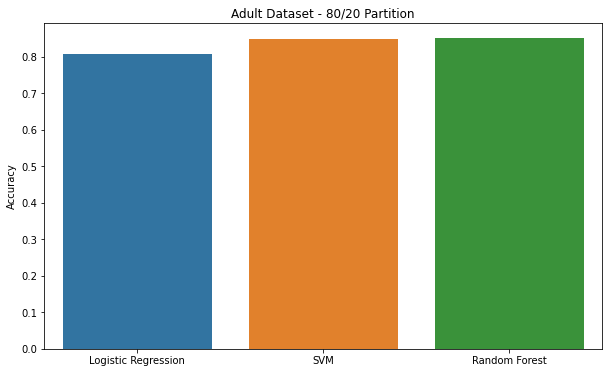

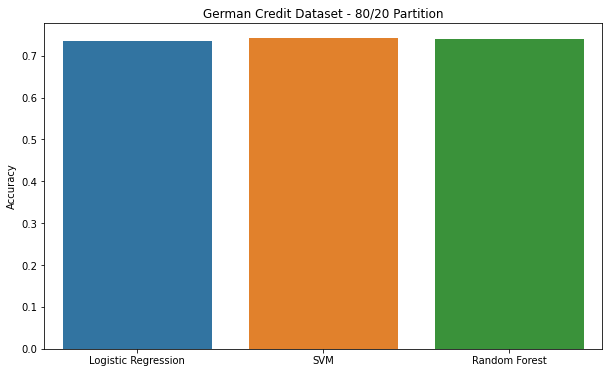

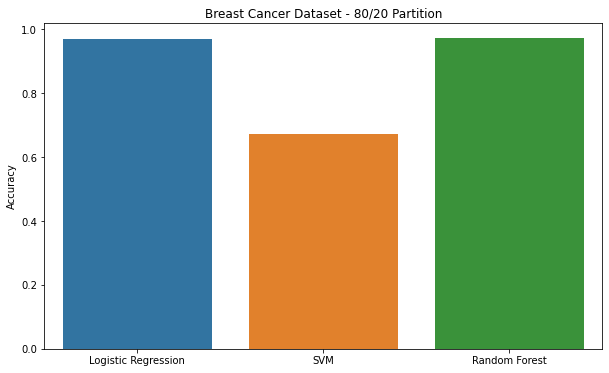

In [76]:
# Plotting results for each dataset
datasets = {'Adult Dataset': results_adult, 'German Credit Dataset': results_credit, 'Breast Cancer Dataset': results_german}
for dataset_name, dataset_results in datasets.items():
    plt.figure(figsize=(10, 6))
    for partition, scores in dataset_results.items():
        sns.barplot(x=list(scores.keys()), y=list(scores.values()))
        plt.title(f'{dataset_name} - {partition} Partition')
        plt.ylabel('Accuracy')
    plt.show()


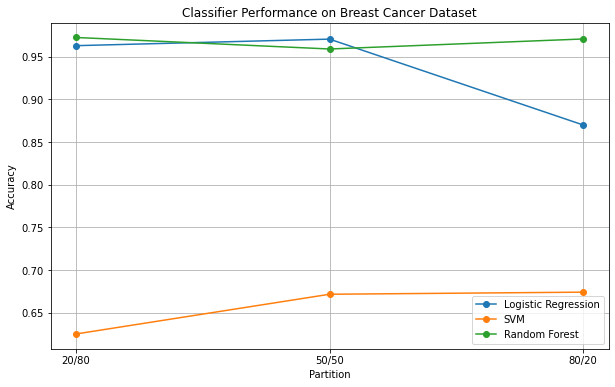

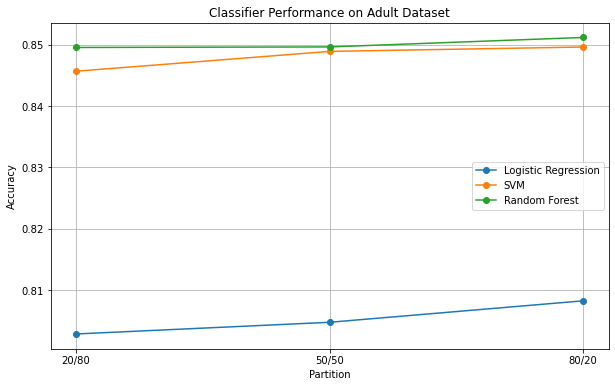

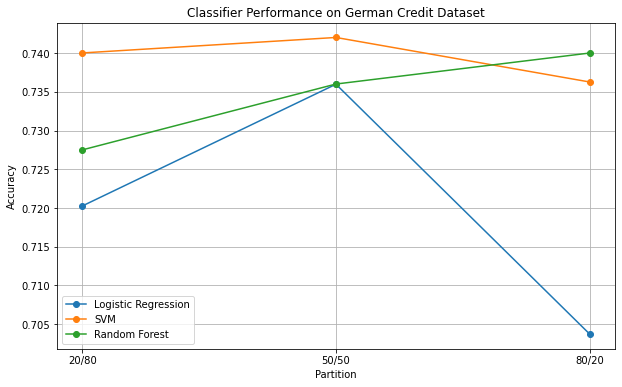

In [77]:
import matplotlib.pyplot as plt

# Data from the table provided by the user
data = {
    'Breast Cancer': {
        'Logistic Regression': [0.962963, 0.970631, 0.869963],
        'SVM': [0.624960, 0.671531, 0.673993],
        'Random Forest': [0.972578, 0.959064, 0.970803]
    },
    'Adult': {
        'Logistic Regression': [0.802884, 0.804787, 0.808280],
        'SVM': [0.845656, 0.848883, 0.849600],
        'Random Forest': [0.849523, 0.849612, 0.851152]
    },
    'German Credit': {
        'Logistic Regression': [0.720262, 0.735974, 0.703740],
        'SVM': [0.740012, 0.742010, 0.736265],
        'Random Forest': [0.727500, 0.736000, 0.740000]
    }
}

# Plotting
partitions = ['20/80', '50/50', '80/20']
for dataset, classifiers in data.items():
    plt.figure(figsize=(10, 6))
    for classifier, accuracies in classifiers.items():
        plt.plot(partitions, accuracies, marker='o', label=classifier)

    plt.title(f'Classifier Performance on {dataset} Dataset')
    plt.xlabel('Partition')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()


In [74]:
import pandas as pd

# Data for the table
data = {
    'Classifier': ['Logistic Regression', 'SVM', 'Random Forest'] * 3,
    'Dataset': ['Breast Cancer', 'Breast Cancer', 'Breast Cancer', 'Adult', 'Adult', 'Adult', 'Credit', 'Credit', 'Credit'],
    '20/80': [0.9629629629629629, 0.6249597423510468, 0.9725776965265083, 
              0.8028843846406951, 0.8456562702812804, 0.8495234148363033, 
              0.7202623247399367, 0.7400120609075834, 0.7275],
    '50/50': [0.9706308544221912, 0.6715313357139161, 0.9590643274853801,
              0.8047874809362775, 0.8488827000862011, 0.8496120946886812,
              0.735973835461607, 0.7420099559916311, 0.736],
    '80/20': [0.86996336996337, 0.6739926739926739, 0.9708029197080292,
              0.8082804923535994, 0.8496000663102491, 0.8511519973479198,
              0.7037396862943877, 0.7362648193517503, 0.74]
}

# Creating a DataFrame
accuracy_table = pd.DataFrame(data)

# Setting the layout for better visibility
accuracy_table = accuracy_table.set_index(['Dataset', 'Classifier'])
accuracy_table = accuracy_table[['20/80', '50/50', '80/20']]

accuracy_table


20/80     50/50     80/20
Dataset       Classifier                                       
Breast Cancer Logistic Regression  0.962963  0.970631  0.869963
              SVM                  0.624960  0.671531  0.673993
              Random Forest        0.972578  0.959064  0.970803
Adult         Logistic Regression  0.802884  0.804787  0.808280
              SVM                  0.845656  0.848883  0.849600
              Random Forest        0.849523  0.849612  0.851152
Credit        Logistic Regression  0.720262  0.735974  0.703740
              SVM                  0.740012  0.742010  0.736265
              Random Forest        0.727500  0.736000  0.740000

The results showcase how Logistic Regression, SVM, and Random Forest classifiers perform across three UCI datasets. Random Forest consistently excels, particularly with the Breast Cancer data, suggesting its strong fit for complex patterns. SVM shows competitive performance on the Adult dataset, indicating its capability with diverse features. Logistic Regression improves with more data, highlighting its reliance on larger datasets to better model relationships. Overall, more training data tends to enhance classifier accuracy, but the extent varies by classifier and dataset. These results align with expectations that more training data generally leads to better classifier performance.

The results reveal a trend where the partition size impacts classifier performance. With the Breast Cancer dataset, Logistic Regression and Random Forest perform better with a more balanced split (50/50), suggesting they benefit from a sufficient amount of data to learn the intricate details. SVM's performance remains relatively lower across partitions, indicating potential issues with feature representation or model complexity.

For the Adult and German Credit datasets, the classifiers tend to perform better with more training data (80/20 split), highlighting the importance of ample examples to generalize effectively. However, the performance increase is not drastic, suggesting that after a certain point, additional data provides diminishing returns and that the quality of data and feature engineering may play a more significant role.
